In [1]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [4]:
df = df.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

In [5]:
df['month'] = df['기준일'].dt.month
df['year'] = df['기준일'].dt.year
df['day'] = df['기준일'].dt.day

In [6]:
df = df[df['상세어종'] == '연어']

In [7]:
# 제조국 별로 데이터를 살펴봤을 때 노르웨이, 영국을 제외하고 데이터가 100이상인 데이터가 없다.
for i in df.제조국.unique():
  print(f'{i}',len(df[df['제조국'] == i]))

노르웨이 1278
캐나다 51
영국 120
칠레 3
아일랜드 2
미국 5
러시아 11
아이슬란드 3
베트남 1
뉴질랜드 3
호주 12


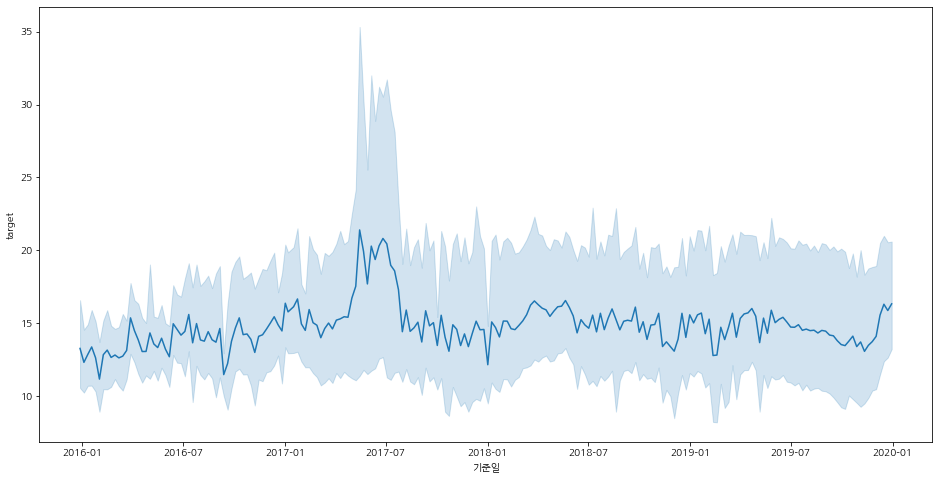

In [8]:
# 2017년 몇개의 데이터를 제외하고 큰 이상치가 나타나진 않는다.
plt.figure(figsize = (16,8))
sns.lineplot(data = df, x = '기준일', y = 'target')

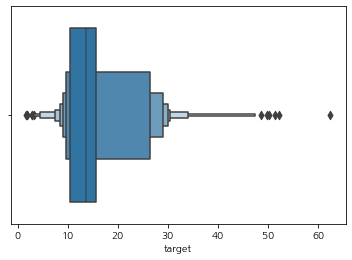

In [9]:
# 이상치도 많이 존재 하는 것으로 보인다.
sns.boxenplot(df['target'])

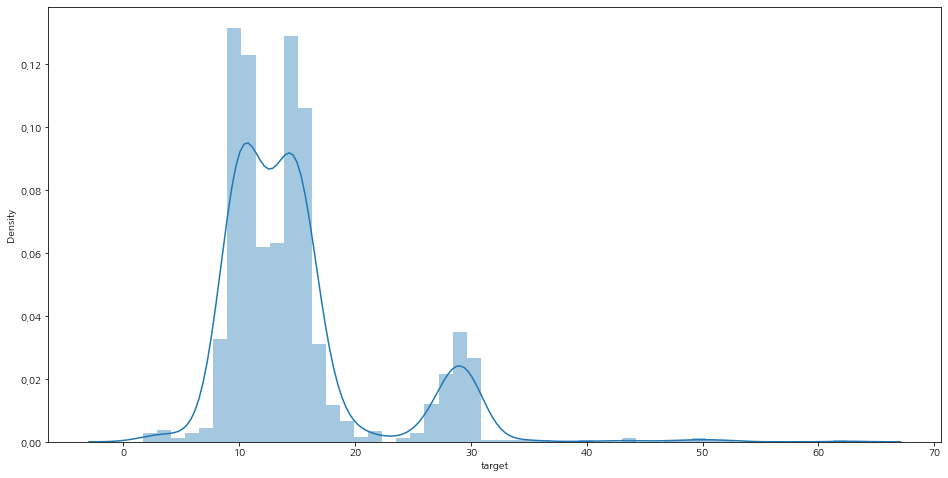

In [10]:
# 분포가 쌍곡분포를 따른다.
plt.figure(figsize = (16,8))
sns.distplot(df['target'])

In [11]:
# 이상치 제거를 IQR 방법을 통해서 제거해 보도록 하자.
def get_outlier(df=None, column=None, weight=4.0):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

delete_index = get_outlier(df = df, column = 'target', weight = 3.0)
print(delete_index)
df_iqr = df.drop(delete_index, axis = 0)

Int64Index([14005, 14240, 14444, 14639, 14834, 15054, 15244, 15449, 15607,
            15663, 15859, 16051, 20171, 26537],
           dtype='int64')


In [12]:
# 노르웨이의 가격 인상으로 인해서 이상치가 생겨났다.
# 대부분의 데이터가 2017년의 데이터라는 걸 확인할 수 있다.
df.loc[delete_index,:]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
14005,2017-05-08,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",34.521310,5,2017,8
14240,2017-05-15,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",62.457202,5,2017,15
14444,2017-05-22,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",49.777500,5,2017,22
14639,2017-05-29,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",40.521693,5,2017,29
14834,2017-06-05,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",51.394008,6,2017,5
15054,2017-06-12,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.791678,6,2017,12
15244,2017-06-19,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",48.550884,6,2017,19
15449,2017-06-26,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.481666,6,2017,26
15607,2017-07-03,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",32.806026,7,2017,3
15663,2017-07-03,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",50.173407,7,2017,3


Text(0.5, 1.0, '이상치 제거를 안했을 때 lineplot')

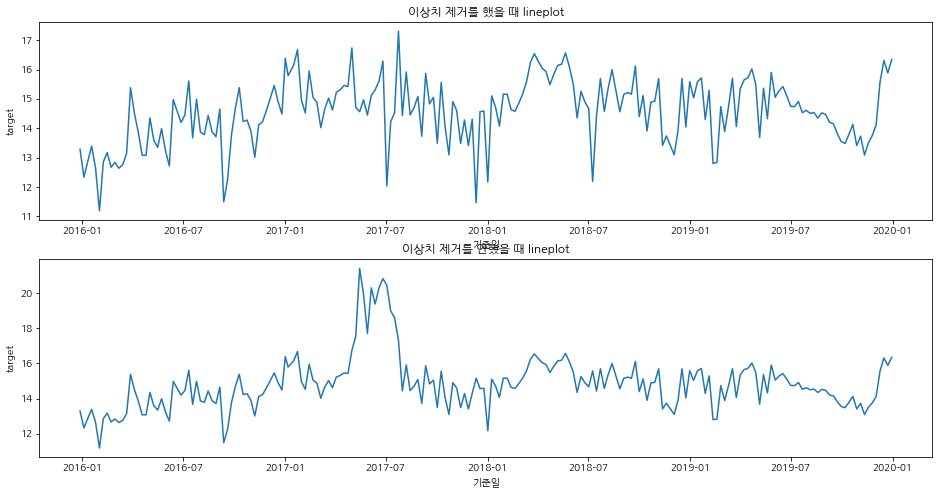

In [13]:
# 이상치 제거를 했을 때와 안했을 때 차이가 있는지 확인해 보자.
plot_data = df_iqr[['기준일','target']].groupby('기준일').mean().reset_index()
plot_data1 = df[['기준일', 'target']].groupby('기준일').mean().reset_index()
plot_data

fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.lineplot(data = plot_data, x = '기준일', y = 'target', ax = ax[0])
sns.lineplot(data = plot_data1, x = '기준일', y = 'target', ax = ax[1])
ax[0].set_title('이상치 제거를 했을 때 lineplot')
ax[1].set_title('이상치 제거를 안했을 때 lineplot')

Text(0.5, 1.0, '이상치를 제거 안했을 때 boxenplot')

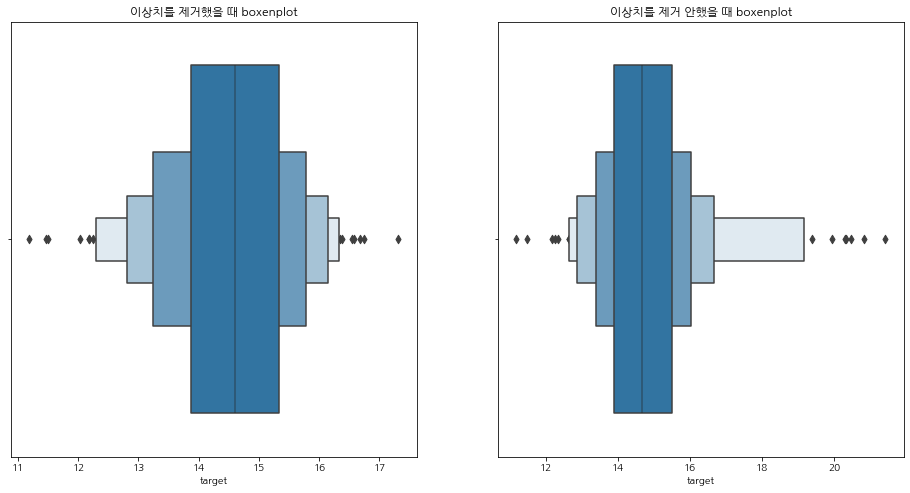

In [14]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(plot_data['target'], ax = ax[0])
sns.boxenplot(plot_data1['target'], ax = ax[1])
ax[0].set_title('이상치를 제거했을 때 boxenplot')
ax[1].set_title('이상치를 제거 안했을 때 boxenplot')

Text(0.5, 1.0, '이상치를 제거 안했을 때 distplot')

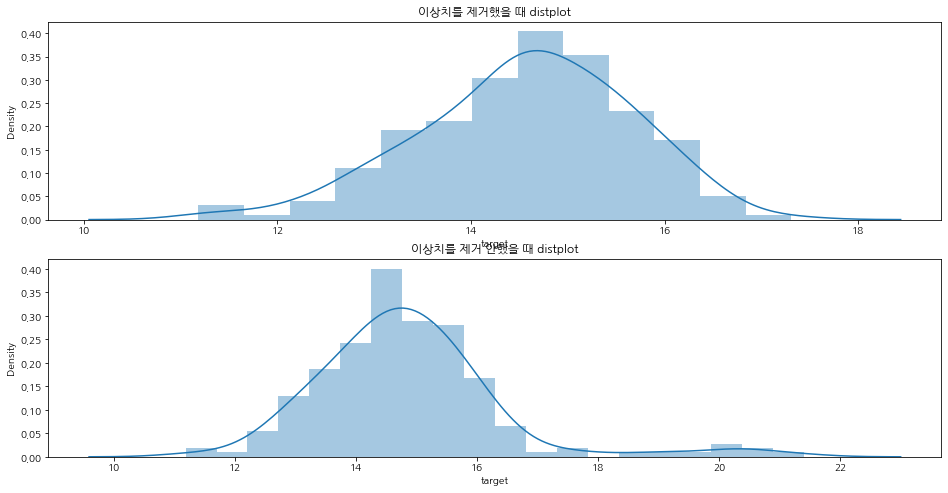

In [15]:
# 이상치를 제거했을 때와 제거를 안했을 때를 비교해보자.
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.distplot(plot_data['target'], ax = ax[0])
sns.distplot(plot_data1['target'], ax = ax[1])
ax[0].set_title('이상치를 제거했을 때 distplot')
ax[1].set_title('이상치를 제거 안했을 때 distplot')

In [16]:
# 위의 그래프를 보면 이상치를 제거했을 때 log를 정규성이 되지 않을까?
from scipy.stats import shapiro
alpha = 0.05

# 이상치를 제거했을 때 정규성을 띄는 것을 볼 수 있다.
# p_value > 0.05임으로 정규성을 만족한다.
stats, p = shapiro(plot_data['target'])
print('이상치 제거 데이터 :',stats, p)

# 이상치를 제거하고 log를 씌웠을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data['target'].apply(lambda x:np.log1p(x)))
print('이상치 제거 데이터 + log :', stats, p)

# 이상치를 제거하지 않았을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data1['target'])
print('이상치 제거하지 않았을 때 :', stats, p)

# 이상치를 제거하지 않았을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data1['target'].apply(lambda x:np.log1p(x)))
print('이상치 제거하지 않았을 때 + log:', stats, p)

이상치 제거 데이터 : 0.9883154034614563 0.08381788432598114
이상치 제거 데이터 + log : 0.9764614105224609 0.0013710882049053907
이상치 제거하지 않았을 때 : 0.8905965685844421 3.096723572015847e-11
이상치 제거하지 않았을 때 + log: 0.9343797564506531 4.1611492918036674e-08


정규성을 만족하는 것은 이상치를 제거하면 만족한다.

# Modeling

In [17]:
df_iqr

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41994,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",16.495971,12,2019,30
41995,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",18.350634,12,2019,30
42044,2019-12-30,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,11.128269,12,2019,30
42056,2019-12-30,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",15.631531,12,2019,30


In [18]:
# data = df_iqr.copy()
# data['수입용도'] = data['수입용도'].map({'판매용':2, '자사제품제조용':1, '외화획득용 원료':0})
data = pd.get_dummies(df_iqr, columns = ['제조국','수입용도','수입형태','month']).drop(['제품구분','수출국','어종','상세어종','중분류명 카테고리','year','day'], axis = 1)
train = data[data['기준일'] < '2019']
val = data[data['기준일'] > '2019']
train = train.groupby('기준일').mean().reset_index(drop = True)
val = val.groupby('기준일').mean().reset_index(drop = True)

In [19]:
!pip install catboost

In [20]:
# 모든 모델을 돌려서 rmse를 측정해 보자.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train, y_train = train.drop('target', axis = 1), train['target']
X_val, y_val = val.drop('target', axis = 1), val['target']

models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  RMSE = mean_squared_error(y_val, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[08:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.028104
0:	learn: 1.1448866	total: 46.4ms	remaining: 46.3s
1:	learn: 1.1371848	total: 47ms	remaining: 23.4s
2:	learn: 1.1302318	total: 47.5ms	remaining: 15.8s
3:	learn: 1.1228985	total: 48.1ms	remaining: 12s
4:	learn: 1.1157715	total: 48.7ms	remaining: 9.69s
5:	learn: 1.1083341	total: 49.3ms	remaining: 8.17s
6:	learn: 1.1012156	total: 49.8ms	remaining: 7.07s
7:	learn: 1.0944363	total: 50.4ms	remaining: 6.25s
8:	learn: 1.0874600	total: 51ms	remaining: 5.62s
9:	learn: 1.0834205	total: 51.5ms	remaining: 5.1s
10:	learn: 1.0772820	total: 52ms	remaining: 4.68s
11:	learn: 1.0710079	total: 52.6ms	remaining: 4.33s
12:	learn: 1.0638218	total: 53.1ms	remaining: 4.03s
13:	learn: 1.0576252	total: 53.6ms	remaining: 3.78s
14:	learn: 1.0517550	total: 54.1ms	remaining: 3.55s
15:	learn: 1.0457829	total: 54.6ms	remaining: 3.36s
16:	learn: 1.0414827	total: 55

In [21]:
!pip install vecstack

In [22]:
from vecstack import stacking

def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)

models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

S_train, S_test = stacking(models, X_train, y_train, X_val, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LinearRegression()
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = rmse(y_val, y_pred)

print(RMSE)

[08:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.059889
0:	learn: 1.0103465	total: 12ms	remaining: 12s
1:	learn: 0.9878382	total: 20.6ms	remaining: 10.3s
2:	learn: 0.9659112	total: 28.9ms	remaining: 9.61s
3:	learn: 0.9560792	total: 37.3ms	remaining: 9.28s
4:	learn: 0.9388577	total: 43.7ms	remaining: 8.69s
5:	learn: 0.9209143	total: 52.3ms	remaining: 8.66s
6:	learn: 0.9028852	total: 63.1ms	remaining: 8.95s
7:	learn: 0.8969725	total: 75.1ms	remaining: 9.31s
8:	learn: 0.8815027	total: 83.6ms	remaining: 9.2s
9:	learn: 0.8702005	total: 91.9ms	remaining: 9.1s
10:	learn: 0.8633069	total: 100ms	remaining: 9.01s
11:	learn: 0.8555698	total: 110ms	

In [23]:
from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb),('lasso',lasso)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_val)

RMSE = rmse(y_val, y_pred)

print(RMSE)

0.7238124611391994


In [24]:
import statsmodels.api as sm

X = sm.add_constant(train.drop('target', axis = 1))
y = train['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     4.321
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           4.39e-09
Time:                        08:28:34   Log-Likelihood:                -192.82
No. Observations:                 158   AIC:                             445.6
Df Residuals:                     128   BIC:                             537.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.6891 

[08:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 0, 'Xgboost Feature Importance')

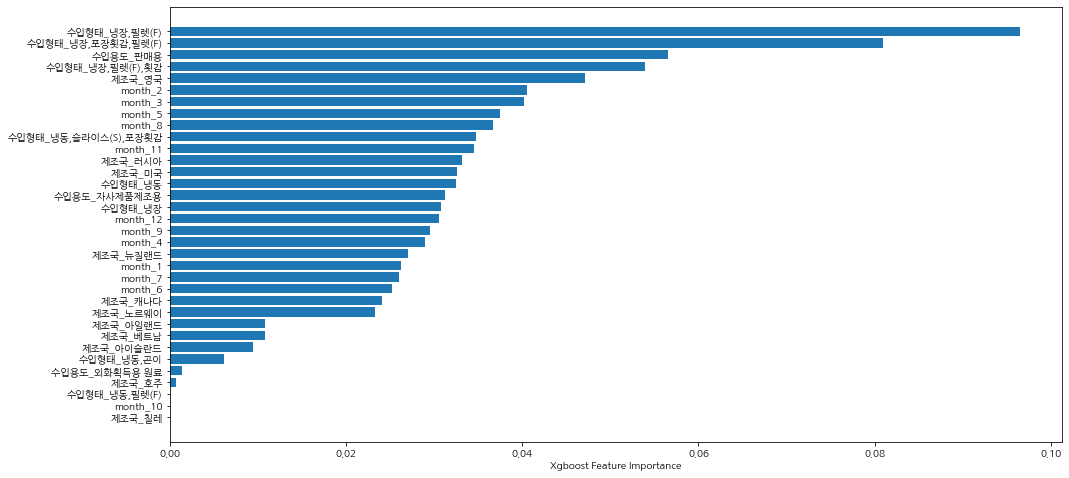

In [25]:
# XGB importance
model = XGBRegressor(random_state =42)
model.fit(train.drop('target', axis = 1), train['target'])

sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize = (16,8))
plt.barh(train.drop('target', axis = 1).columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel('Xgboost Feature Importance')

In [26]:
# 다중 공선성을 확인하려고 했지만 inf만 나오게 된다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train.drop('target', axis = 1).values, i) for i in range(train.drop('target',axis = 1).shape[1])]
vif['features'] = train.drop('target',axis =1).columns
vif

,VIF Factor,features
0,inf,제조국_노르웨이
1,inf,제조국_뉴질랜드
2,inf,제조국_러시아
3,inf,제조국_미국
4,inf,제조국_베트남
5,inf,제조국_아이슬란드
6,inf,제조국_아일랜드
7,inf,제조국_영국
8,inf,제조국_칠레
9,inf,제조국_캐나다


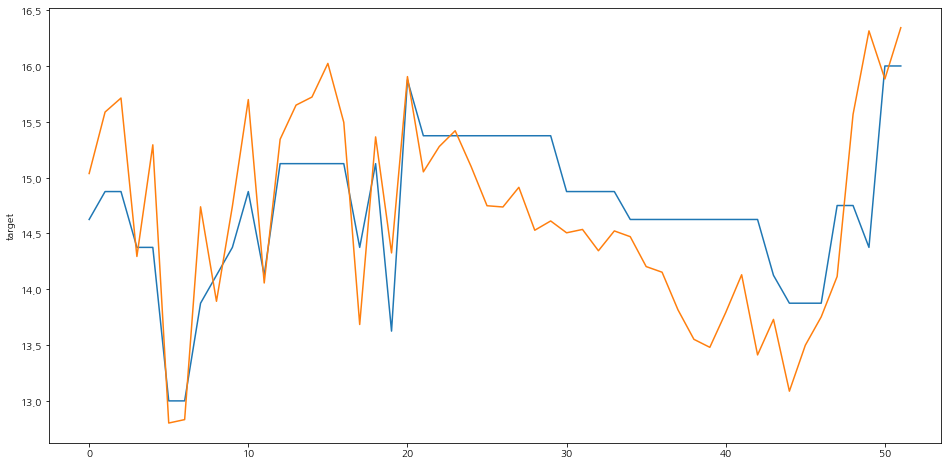

In [27]:
# 가장 잘 나온 linear regression을 살펴보자.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred = pd.DataFrame(y_pred, columns = ['target'])
y_val = pd.DataFrame(y_val, columns = ['target'])
plt.figure(figsize = (16,8))
sns.lineplot(data = y_pred,x = y_pred.index, y = 'target',palette= 'Blues')
sns.lineplot(data = y_val, x = y_val.index, y = 'target',palette = 'cubehelix', markers= 'o')
plt.show()


# 이상치 제거 이후

In [28]:
df.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28


Text(0.5, 1.0, '수입용도 count')

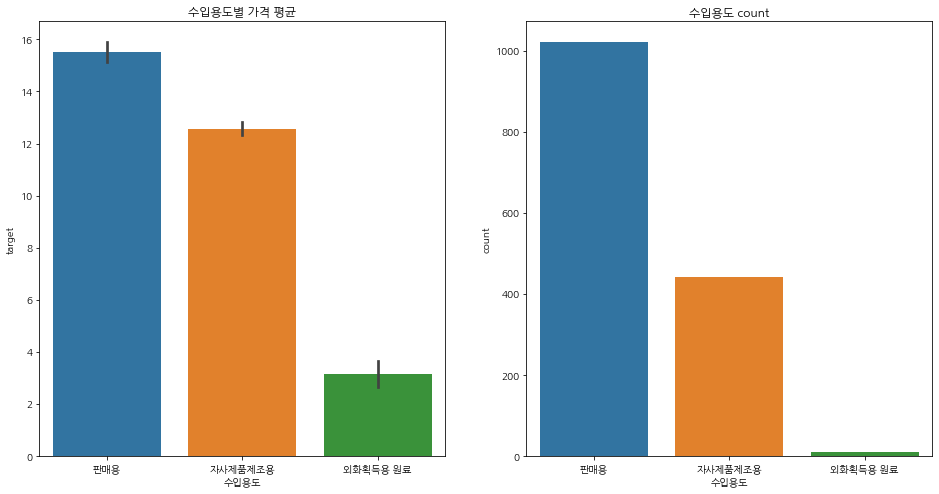

In [29]:
# 이상치를 제거하기 전과 똑같이 분포가 그려지게 된다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = df_iqr, x = '수입용도', y = 'target', ax = ax[0])
sns.countplot(df_iqr['수입용도'], ax = ax[1])
ax[0].set_title('수입용도별 가격 평균')
ax[1].set_title('수입용도 count')

Text(0.5, 1.0, '제조국별 countplot')

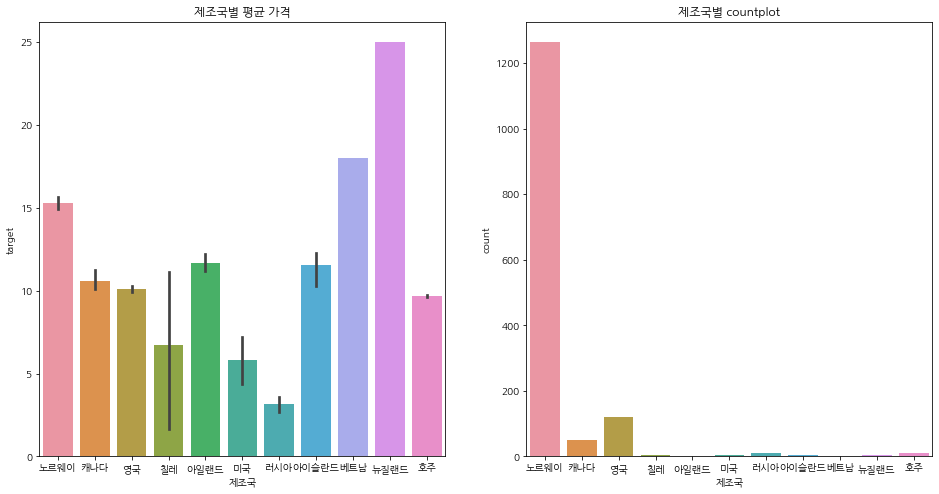

In [30]:
# 가격은 뉴질랜드와 베트남이 높다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = df_iqr, x = '제조국', y = 'target', ax = ax[0])
sns.countplot(df_iqr['제조국'], ax = ax[1])
ax[0].set_title('제조국별 평균 가격')
ax[1].set_title('제조국별 countplot')

In [31]:
# 베트남은 1곳 뉴질랜드는 3곳이 있다.
df_iqr[(df_iqr['제조국'] == '뉴질랜드') | (df_iqr['제조국'] == '베트남')]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
24853,2018-05-14,수산물,베트남,베트남,판매용,어류,연어,연어,"냉동,슬라이스(S),포장횟감",18.0,5,2018,14
26846,2018-07-23,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,7,2018,23
27413,2018-08-13,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,8,2018,13
31110,2018-12-17,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,12,2018,17


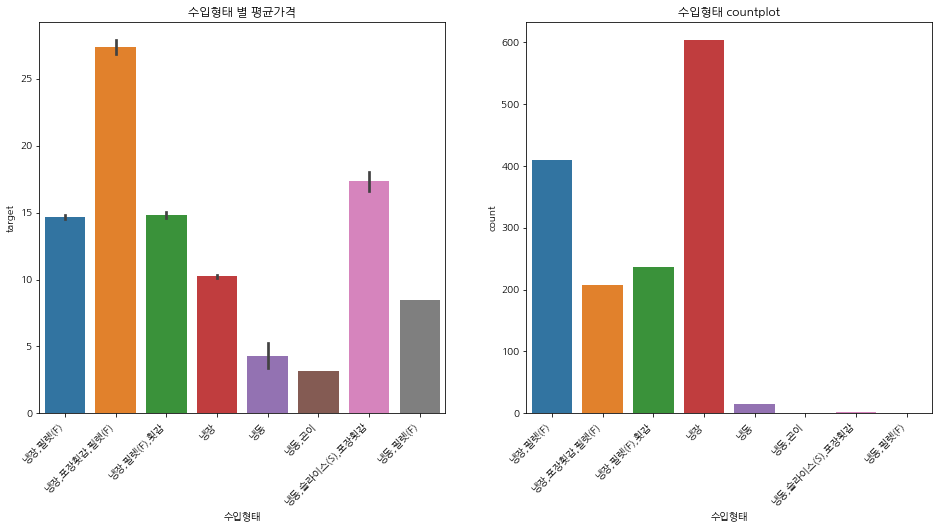

In [32]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = df_iqr, x = '수입형태', y = 'target', ax = ax[0])
sns.countplot(df_iqr['수입형태'], ax = ax[1])
ax[0].set_title('수입형태 별 평균가격')
ax[1].set_title('수입형태 countplot')
fig.autofmt_xdate(rotation=45)

- 냉장, 냉장,필렛(F), 냉장,포장횟감,필렛(F), 냉장,필렛(F),횟감, other 이렇게 5가지로 범주화 해서 데이터 분석을 진행하면 어떨까?

In [33]:
# 연어같은 경우에 노르웨이의 가격은 연어의 표준 지표로 사용되고 있다.
# 그러면 다른 변수를 배제하고 분석을 진행한다면 더 좋은 예측이 되지 않을까?

In [34]:
df_iqr['수입용도'].unique()

array(['판매용', '자사제품제조용', '외화획득용 원료'], dtype=object)

In [35]:
print('판매용 :', df_iqr[df_iqr['수입용도'] == '판매용']['수입형태'].unique())
print('자사제품제조용 :', df_iqr[df_iqr['수입용도'] == '자사제품제조용']['수입형태'].unique())
print('외화획득용 원료 :', df_iqr[df_iqr['수입용도'] == '외화획득용 원료']['수입형태'].unique())

판매용 : ['냉장,필렛(F)' '냉장,포장횟감,필렛(F)' '냉장,필렛(F),횟감' '냉장' '냉동' '냉동,곤이'
 '냉동,슬라이스(S),포장횟감' '냉동,필렛(F)']
자사제품제조용 : ['냉장,필렛(F)' '냉장' '냉장,필렛(F),횟감']
외화획득용 원료 : ['냉동']


In [36]:
# 하나하나 데이터를 살펴보도록 하자.
df_iqr[(df_iqr['수입용도'] == '자사제품제조용') & (df_iqr['수입형태'] == '냉장,필렛(F)')]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28
389,2016-01-04,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.760151,1,2016,4
610,2016-01-11,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",16.509292,1,2016,11
796,2016-01-18,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",15.226723,1,2016,18
1004,2016-01-25,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.467319,1,2016,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41213,2019-12-02,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.615013,12,2019,2
41433,2019-12-09,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",14.954619,12,2019,9
41663,2019-12-16,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",21.650703,12,2019,16
41876,2019-12-23,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",15.624160,12,2019,23


Text(0.5, 1.0, '수입용도별 lineplot')

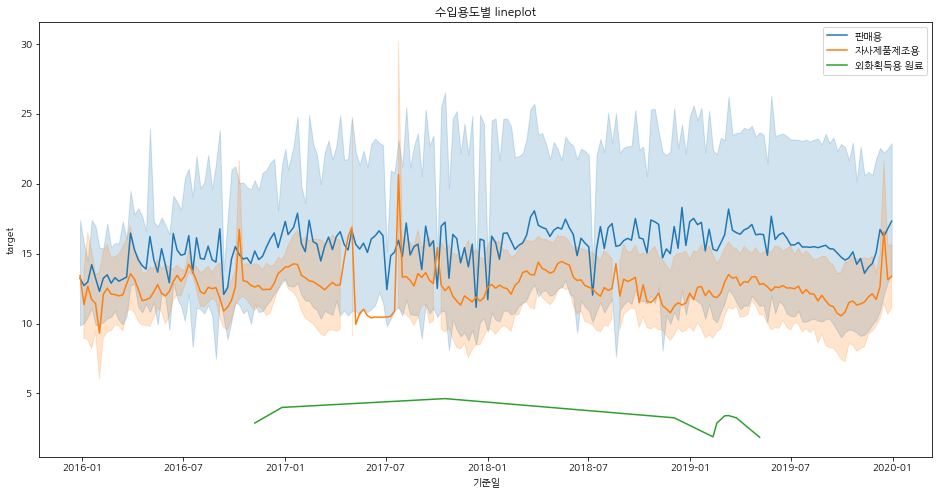

In [37]:
# 수입용도별 lineplot
plt.figure(figsize = (16,8))
for i in df_iqr['수입용도'].unique():
  sns.lineplot(data = df_iqr[df_iqr['수입용도'] == i], x = '기준일', y = 'target')
plt.legend(labels=[i for i in df_iqr['수입용도'].unique()])
plt.title('수입용도별 lineplot')

Text(0.5, 1.0, '수입형태별 lineplot')

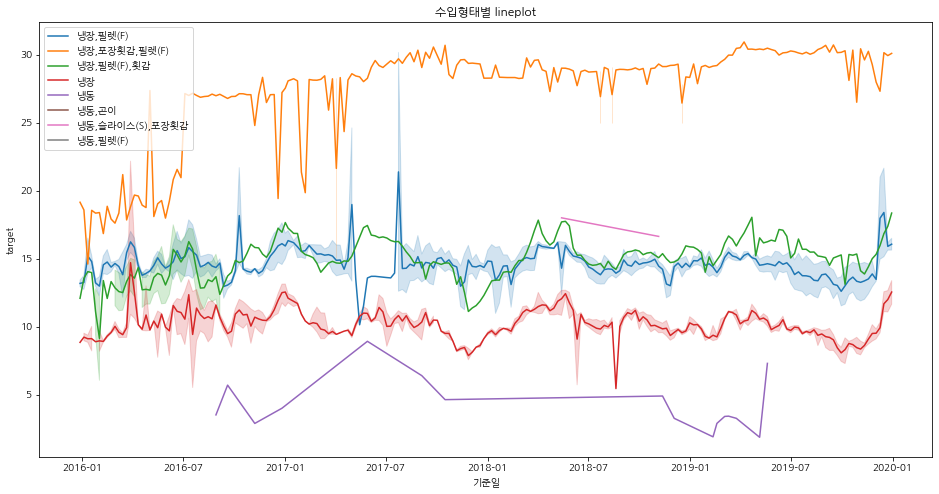

In [38]:
# 수입형태별 lineplot
plt.figure(figsize = (16,8))
for i in df_iqr['수입형태'].unique():
  sns.lineplot(data = df_iqr[df_iqr['수입형태'] == i], x = '기준일', y = 'target')
plt.legend(labels=[i for i in df_iqr['수입형태'].unique()])
plt.title('수입형태별 lineplot')

# 수산물 가격 지수 확인해보기

In [39]:
seafood_df = pd.read_csv('/content/drive/MyDrive/빅콘테스트/수산물 2015년지수.csv', encoding = 'cp949')

In [40]:
seafood_df = seafood_df[(seafood_df['계정항목코드별'] == '수산물') & (seafood_df['통화계약구분코드별'] == '계약통화기준')].drop(['항목','단위','계정항목코드별','통화계약구분코드별'], axis = 1).T

In [41]:
seafood_df.index = [i.replace('월','') for i in seafood_df.index]
seafood_df.index = [i.replace(' ','') for i in seafood_df.index]
seafood_df.index = [i.replace('.', '-') for i in seafood_df.index]
seafood_df = seafood_df.rename(columns = {58: '수산물지수'}).reset_index().drop(49, axis = 0)

In [42]:
df_iqr['기준일'] = df_iqr['기준일'].astype('str')
df_iqr['year_month'] = df_iqr['기준일'].apply(lambda x: x[:7])

In [43]:
seafood_df = seafood_df.rename(columns = {'index':'year_month'})
df_iqr = pd.merge(df_iqr, seafood_df, how = 'left', on = 'year_month')

연어 가격과 유가, 환율(https://m.mt.co.kr/renew/view.html?no=2016011409262065338&googleamp)

In [44]:
# 연어 데이터에서 관측된 고유한 수입형태
연어_수입형태 = set()

for index in df_iqr.index:
    value_list = df_iqr.loc[index, '수입형태'].split(',')

    연어_수입형태.update(value_list)

# 고유한 수입형태에 모두 0 넣어주기
df_iqr[list(연어_수입형태)] = 0

for index in df_iqr.index:

    value_list = df_iqr.loc[index, '수입형태'].split(',')

    for value in value_list:
        df_iqr.loc[index, value] = 1

In [45]:
# df_iqr : 연어데이터 추출한거임
df_iqr = df_iqr[df_iqr['어종'] == '연어'].reset_index(drop = True)

In [46]:
df_iqr.columns

Index(['기준일', '제품구분', '제조국', '수출국', '수입용도', '중분류명 카테고리', '어종', '상세어종', '수입형태',
       'target', 'month', 'year', 'day', 'year_month', '수산물지수', '필렛(F)', '냉동',
       '횟감', '포장횟감', '냉장', '곤이', '슬라이스(S)'],
      dtype='object')

In [47]:
# df_수입형태에 수입형태의 count를 해놓는다.
df_수입형태 = df_iqr[['기준일','슬라이스(S)','냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감']].groupby('기준일').mean().reset_index()

In [48]:
df_수입형태

,기준일,슬라이스(S),냉장,필렛(F),냉동,포장횟감,곤이,횟감
0,2015-12-28,0.0,1.0,0.800000,0.0,0.200000,0.0,0.200000
1,2016-01-04,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
2,2016-01-11,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667
3,2016-01-18,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667
4,2016-01-25,0.0,1.0,0.833333,0.0,0.166667,0.0,0.333333
...,...,...,...,...,...,...,...,...
205,2019-12-02,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
206,2019-12-09,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
207,2019-12-16,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000
208,2019-12-23,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000


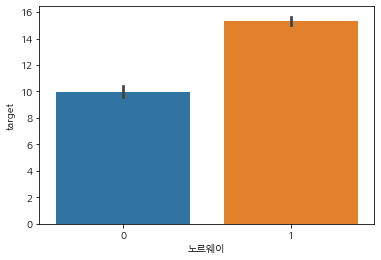

In [49]:
df_iqr['노르웨이'] = df_iqr['제조국'].apply(lambda x:1 if x == '노르웨이' else 0)
sns.barplot(data = df_iqr, x = '노르웨이', y = 'target')

In [50]:
# 수입용도 더미화, 수입형태 나눠서 count, 제조국 노르웨이 :1 나머지 :0 그러면 이걸 더미화를 진행해서 count?
data = df_iqr.drop(['제품구분','수출국','중분류명 카테고리','어종','상세어종','year','day','수산물지수','year_month','수입형태'], axis = 1)

In [51]:
data = pd.get_dummies(data = data, columns = ['제조국','수입용도','month'])

In [52]:
data.columns

Index(['기준일', 'target', '필렛(F)', '냉동', '횟감', '포장횟감', '냉장', '곤이', '슬라이스(S)',
       '노르웨이', '제조국_노르웨이', '제조국_뉴질랜드', '제조국_러시아', '제조국_미국', '제조국_베트남',
       '제조국_아이슬란드', '제조국_아일랜드', '제조국_영국', '제조국_칠레', '제조국_캐나다', '제조국_호주',
       '수입용도_외화획득용 원료', '수입용도_자사제품제조용', '수입용도_판매용', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [53]:
final_data = data.groupby('기준일').mean().reset_index()[['기준일','target','수입용도_외화획득용 원료','수입용도_자사제품제조용','수입용도_판매용','노르웨이']]

In [54]:
final_data.head()

,기준일,target,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,노르웨이
0,2015-12-28,13.287212,0.0,0.200000,0.800000,1.000000
1,2016-01-04,12.331994,0.0,0.285714,0.714286,0.857143
2,2016-01-11,12.876513,0.0,0.333333,0.666667,1.000000
3,2016-01-18,13.387350,0.0,0.333333,0.666667,1.000000
4,2016-01-25,12.644323,0.0,0.333333,0.666667,1.000000


In [55]:
final_data = pd.merge(final_data, df_수입형태, how = 'left', on = '기준일')

In [56]:
import statsmodels.api as sm

X = sm.add_constant(final_data.drop(['target','기준일'], axis = 1))
y = final_data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     12.28
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           2.08e-15
Time:                        08:28:55   Log-Likelihood:                -270.98
No. Observations:                 210   AIC:                             562.0
Df Residuals:                     200   BIC:                             595.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1005      0.551      9.259

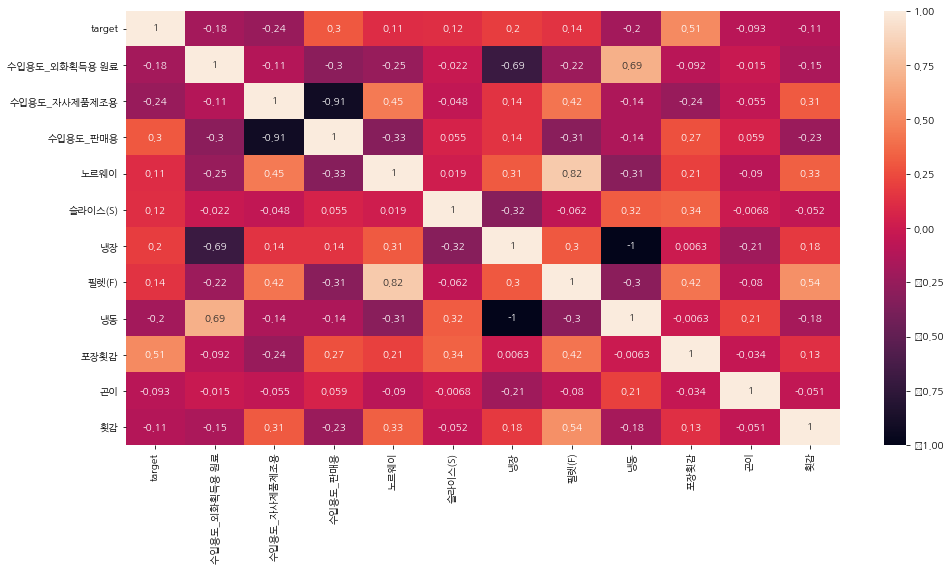

In [57]:
plt.figure(figsize = (16,8))
sns.heatmap(final_data.corr(), annot = True)

In [58]:
train = final_data[final_data['기준일'] < '2019'].drop('기준일', axis = 1)
val = final_data[final_data['기준일'] > '2019'].drop('기준일', axis = 1)

In [59]:
# 모든 모델을 돌려서 rmse를 측정해 보자.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train, y_train = train.drop('target', axis = 1), train['target']
X_val, y_val = val.drop('target', axis = 1), val['target']

models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  RMSE = mean_squared_error(y_val, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[08:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.028104
0:	learn: 1.1445841	total: 400us	remaining: 400ms
1:	learn: 1.1357882	total: 882us	remaining: 441ms
2:	learn: 1.1281905	total: 1.35ms	remaining: 450ms
3:	learn: 1.1209204	total: 1.8ms	remaining: 447ms
4:	learn: 1.1131515	total: 2.26ms	remaining: 450ms
5:	learn: 1.1056544	total: 2.71ms	remaining: 449ms
6:	learn: 1.0987073	total: 3.16ms	remaining: 448ms
7:	learn: 1.0911357	total: 3.6ms	remaining: 446ms
8:	learn: 1.0847120	total: 4.06ms	remaining: 447ms
9:	learn: 1.0783595	total: 4.5ms	remaining: 446ms
10:	learn: 1.0723610	total: 4.93ms	remaining: 444ms
11:	learn: 1.0672913	total: 5.49ms	remaining: 452ms
12:	learn: 1.0618736	total: 5.91ms	remaining: 449ms
13:	learn: 1.0552458	total: 6.44ms	remaining: 454ms
14:	learn: 1.0486299	total: 6.88ms	remaining: 452ms
15:	learn: 1.0431801	total: 7.34ms	remaining: 451ms
16:	learn: 1.0375488	total

In [60]:
def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)

models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

S_train, S_test = stacking(models, X_train, y_train, X_val, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LinearRegression()
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = rmse(y_val, y_pred)

print(RMSE)

[08:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.059889
0:	learn: 1.0113804	total: 8.97ms	remaining: 8.96s
1:	learn: 0.9923911	total: 15.9ms	remaining: 7.94s
2:	learn: 0.9728980	total: 23.4ms	remaining: 7.76s
3:	learn: 0.9551495	total: 32.6ms	remaining: 8.13s
4:	learn: 0.9399349	total: 40.2ms	remaining: 8.01s
5:	learn: 0.9249211	total: 47.2ms	remaining: 7.82s
6:	learn: 0.9118343	total: 56.6ms	remaining: 8.03s
7:	learn: 0.8987925	total: 66.3ms	remaining: 8.22s
8:	learn: 0.8883737	total: 72.7ms	remaining: 8s
9:	learn: 0.8779025	total: 80.1ms	remaining: 7.93s
10:	learn: 0.8684812	total: 86.4ms	remaining: 7.77s
11:	learn: 0.8611746	total: 95

In [61]:
lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb),('lasso',lasso)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_val)

RMSE = rmse(y_val, y_pred)

print(RMSE)

0.8202664354297441


## Clustering

In [62]:
!pip install yellowbrick

In [63]:
final_data

,기준일,target,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,노르웨이,슬라이스(S),냉장,필렛(F),냉동,포장횟감,곤이,횟감
0,2015-12-28,13.287212,0.0,0.200000,0.800000,1.000000,0.0,1.0,0.800000,0.0,0.200000,0.0,0.200000
1,2016-01-04,12.331994,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
2,2016-01-11,12.876513,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667
3,2016-01-18,13.387350,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667
4,2016-01-25,12.644323,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.833333,0.0,0.166667,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2019-12-02,14.114510,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
206,2019-12-09,15.565930,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857
207,2019-12-16,16.314381,0.0,0.250000,0.750000,0.750000,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000
208,2019-12-23,15.883609,0.0,0.250000,0.750000,0.750000,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000


In [64]:
final_data.columns

Index(['기준일', 'target', '수입용도_외화획득용 원료', '수입용도_자사제품제조용', '수입용도_판매용', '노르웨이',
       '슬라이스(S)', '냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감'],
      dtype='object')

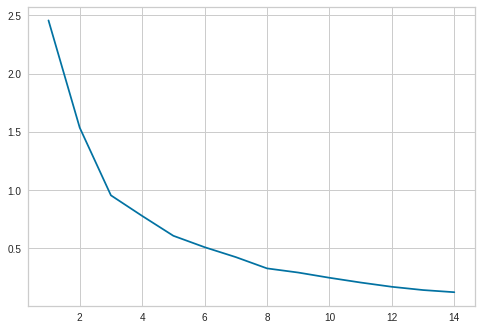

In [65]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from yellowbrick.cluster import KElbowVisualizer

sse = []
for i in range(1, 15):
  model = KMeans(n_clusters = i)

  model.fit(final_data[['슬라이스(S)', '냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감']])
  
  sse.append(model.inertia_)

plt.plot(range(1,15), sse)
plt.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7efdbbabbf50>,
                 k=None, metric=None, model=None, timings=True)

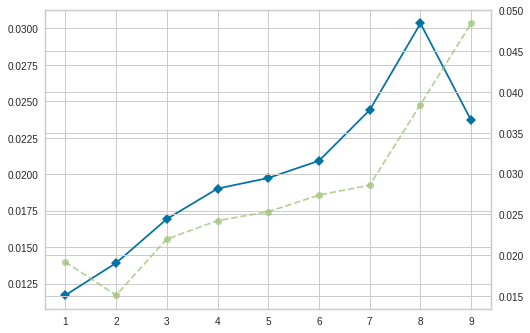

In [66]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 10))
visualizer.fit(final_data[['슬라이스(S)', '냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감']])

In [67]:
model = KMeans(n_clusters = 6)
final_data['clustering'] = model.fit_predict(final_data[['슬라이스(S)', '냉장', '필렛(F)', '냉동', '포장횟감', '곤이', '횟감']])
final_data

,기준일,target,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,노르웨이,슬라이스(S),냉장,필렛(F),냉동,포장횟감,곤이,횟감,clustering
0,2015-12-28,13.287212,0.0,0.200000,0.800000,1.000000,0.0,1.0,0.800000,0.0,0.200000,0.0,0.200000,5
1,2016-01-04,12.331994,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857,0
2,2016-01-11,12.876513,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667,1
3,2016-01-18,13.387350,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.666667,0.0,0.166667,0.0,0.166667,1
4,2016-01-25,12.644323,0.0,0.333333,0.666667,1.000000,0.0,1.0,0.833333,0.0,0.166667,0.0,0.333333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2019-12-02,14.114510,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857,0
206,2019-12-09,15.565930,0.0,0.285714,0.714286,0.857143,0.0,1.0,0.571429,0.0,0.142857,0.0,0.142857,0
207,2019-12-16,16.314381,0.0,0.250000,0.750000,0.750000,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000,3
208,2019-12-23,15.883609,0.0,0.250000,0.750000,0.750000,0.0,1.0,0.500000,0.0,0.125000,0.0,0.125000,3


In [68]:
# clustering을 더미화 하지 않았을 때
X, y = sm.add_constant(final_data.drop(['기준일','target'], axis = 1)), final_data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     12.20
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           2.22e-16
Time:                        08:29:31   Log-Likelihood:                -266.98
No. Observations:                 210   AIC:                             556.0
Df Residuals:                     199   BIC:                             592.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5286      0.563      9.814

In [69]:
data = pd.get_dummies(data = final_data, columns = ['clustering'])

In [70]:
# clustering을 더미화 했을 때.
X, y = sm.add_constant(data.drop(['기준일','target'], axis = 1)), data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     8.698
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.50e-14
Time:                        08:29:32   Log-Likelihood:                -266.23
No. Observations:                 210   AIC:                             562.5
Df Residuals:                     195   BIC:                             612.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9536      6.779      1.763

In [71]:
from sklearn.model_selection import cross_val_predict

train = data[data['기준일'] < '2019'].drop('기준일', axis = 1)
val = data[data['기준일'] > '2019'].drop('기준일', axis = 1)

X_train, y_train = train.drop('target', axis = 1), train['target']
X_val, y_val = val.drop('target', axis = 1), val['target']

models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  RMSE = mean_squared_error(y_val, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[08:29:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.028104
0:	learn: 1.1467321	total: 373us	remaining: 373ms
1:	learn: 1.1375564	total: 681us	remaining: 340ms
2:	learn: 1.1296885	total: 979us	remaining: 326ms
3:	learn: 1.1216539	total: 1.26ms	remaining: 315ms
4:	learn: 1.1143980	total: 1.56ms	remaining: 310ms
5:	learn: 1.1069658	total: 1.84ms	remaining: 305ms
6:	learn: 1.0994199	total: 2.12ms	remaining: 301ms
7:	learn: 1.0922792	total: 2.4ms	remaining: 298ms
8:	learn: 1.0860224	total: 2.68ms	remaining: 295ms
9:	learn: 1.0803580	total: 2.97ms	remaining: 294ms
10:	learn: 1.0748221	total: 3.25ms	remaining: 292ms
11:	learn: 1.0685976	total: 3.48ms	remaining: 287ms
12:	learn: 1.0615375	total: 3.75ms	remaining: 285ms
13:	learn: 1.0558547	total: 4.05ms	remaining: 285ms
14:	learn: 1.0508588	total: 4.33ms	remaining: 284ms
15:	learn: 1.0449431	total: 4.62ms	remaining: 284ms
16:	learn: 1.0392082	tota

In [72]:
lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)

models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

S_train, S_test = stacking(models, X_train, y_train, X_val, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LinearRegression()
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = rmse(y_val, y_pred)

print(RMSE)

[08:29:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.059889
0:	learn: 1.0132885	total: 10.1ms	remaining: 10.1s
1:	learn: 0.9924439	total: 16.9ms	remaining: 8.41s
2:	learn: 0.9733139	total: 23.7ms	remaining: 7.87s
3:	learn: 0.9554946	total: 33ms	remaining: 8.22s
4:	learn: 0.9408926	total: 40.4ms	remaining: 8.04s
5:	learn: 0.9257327	total: 48ms	remaining: 7.96s
6:	learn: 0.9126872	total: 56.3ms	remaining: 7.99s
7:	learn: 0.9001686	total: 65.6ms	remaining: 8.13s
8:	learn: 0.8890187	total: 73.7ms	remaining: 8.12s
9:	learn: 0.8785672	total: 83.4ms	remaining: 8.25s
10:	learn: 0.8694197	total: 90.6ms	remaining: 8.14s
11:	learn: 0.8578190	total: 99.

In [73]:
lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb),('lasso',lasso)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_val)

RMSE = rmse(y_val, y_pred)

print(RMSE)

0.8381450373746419


In [74]:
# 저번 모델보다 전부 안좋은 성능을 낸다.
# 그러면 어떠한 방식으로 모델링을 하는게 좋을까?
# 환율, 유가, 그리고 나머지 변수들에는 어떤 것들이 있을까?

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data.drop(['target','기준일'], axis = 1).values, i) for i in range(data.drop(['target','기준일'],axis = 1).shape[1])]
vif['features'] = data.drop(['기준일','target'],axis =1).columns
vif

,VIF Factor,features
0,inf,수입용도_외화획득용 원료
1,inf,수입용도_자사제품제조용
2,inf,수입용도_판매용
3,6.898398,노르웨이
4,2.082786,슬라이스(S)
5,inf,냉장
6,12.143184,필렛(F)
7,inf,냉동
8,3.910080,포장횟감
9,1.142593,곤이


## 분석을 진행하면서 데이터 살펴본 결과

시장평균환율 데이터 -> 시장평균환율제도를 토대로 만든 데이터

In [76]:
!curl -X GET "https://api.odcloud.kr/api/15064316/v1/uddi:b63a6984-a2b5-48e4-9120-8ba0056eb7c2?page=1&perPage=10" -H  "accept: application/json"

{"code":-401,"msg":"인증키는 필수 항목 입니다."}


In [77]:
!pip install xmltodict

관세청_관세환율정보 - https://www.data.go.kr/data/15070433/openapi.do

한국수출입 은행 - https://www.koreaexim.go.kr/site/program/financial/exchange?menuid=001001004002002

이 부분의 데이터를 살펴볼 필요가 있다.

In [78]:
# 2019년 데이터 밖에 없으니 데이터를 다시 찾아봐야 할 것 같다.
# (요청) https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?authkey=AUTHKEY1234567890&searchdate=20180102&data=AP01
# from datetime import timedelta
# from urllib.request import Request, urlopen
# from urllib.parse import urlencode, quote_plus
# import requests
# import xmltodict

# date = '2019-12-30'
# encoding_key = 'Dn0VYwuwqwTORPtc96fkXBnFjmP80MM5'
# data = 'AP01'
# for i in range(1000):
#   url = f'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?authkey={encoding_key}&searchdate={date}&data={data}'
#   req = Request(url)
#   resp_body = urlopen(req).read()
#   print(resp_body)
#   json_str = resp_body.decode("UTF-8")  #bytes to str
#   print(json_str)
#   xml_parse = xmltodict.parse(json_str) #xmlr to json dict
#   print(xml_parse)
#   json_obj = json.loads(json.dumps(xml_parse))  #convert json
#   apt = pd.json_normalize(json_obj['response']['body']['items']['item'])
#   date = pd.to_datetime(date) + timedelta(days = 1)
#   date = date.strftime('%Y%m%d')